In [33]:
#question1
#a
import pandas as pd
import numpy as np

data = {
    'Temperature': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

df = pd.DataFrame(data)

df.to_csv('experiment_data.csv', index=False)



In [34]:
def manual_linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)

    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    c = (sum_y - m * sum_x) / n
    return m, c

def manual_quadratic_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_x3 = np.sum(x**3)
    sum_x4 = np.sum(x**4)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x**2 * y)

    
    A = np.array([
        [sum_x4, sum_x3, sum_x2],
        [sum_x3, sum_x2, sum_x],
        [sum_x2, sum_x, n]
    ])
    B = np.array([sum_x2y, sum_xy, sum_y])
    
    
    coeffs = np.linalg.solve(A, B)
    return coeffs  


x = np.array(df['Temperature'])
y = np.array(df['Yield'])

m, c = manual_linear_regression(x, y)
print(f"Linear regression coefficients: m = {m}, c = {c}")

a, b, c = manual_quadratic_regression(x, y)
print(f"Quadratic regression coefficients: a = {a}, b = {b}, c = {c}")


Linear regression coefficients: m = 0.006756756756756866, c = 2.3063063063062974
Quadratic regression coefficients: a = 0.0010756013745703435, b = -0.15371134020617003, c = 7.960481099655804


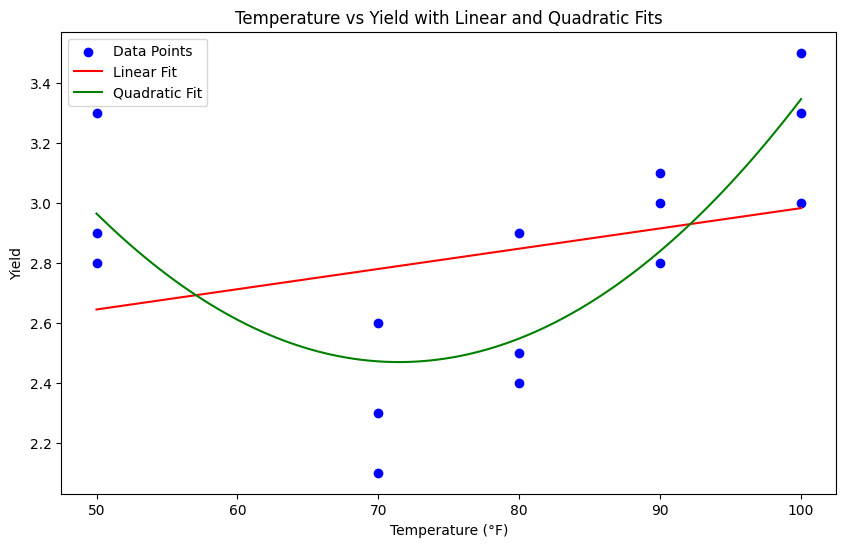

In [35]:
m, intercept = manual_linear_regression(x, y)
quad_coeffs = manual_quadratic_regression(x, y)  # [a, b, c]
quad_poly = np.poly1d(quad_coeffs)


x_fit = np.linspace(min(x), max(x), 100)
y_linear_fit = m * x_fit + intercept
a, b, c = quad_coeffs
y_quadratic_fit = a * x_fit**2 + b * x_fit + c

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_linear_fit, 'r-', label='Linear Fit')
plt.plot(x_fit, y_quadratic_fit, 'g-', label='Quadratic Fit')
plt.xlabel('Temperature (°F)')
plt.ylabel('Yield')
plt.title('Temperature vs Yield with Linear and Quadratic Fits')
plt.legend()
plt.show()

In [36]:
y_pred_linear = m * x + intercept  
y_pred_poly = quad_poly(x)         

# Define MAE, MSE, and RMSE calculation functions
def manual_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def manual_rmse(y_true, y_pred):
    return np.sqrt(manual_mse(y_true, y_pred))

# Use the functions to compute MAE, MSE, and RMSE for both models
mae_linear = manual_mae(y, y_pred_linear)
mae_poly = manual_mae(y, y_pred_poly)
mse_linear = manual_mse(y, y_pred_linear)
mse_poly = manual_mse(y, y_pred_poly)
rmse_linear = manual_rmse(y, y_pred_linear)
rmse_poly = manual_rmse(y, y_pred_poly)

# Print the results
print("MAE Linear:", mae_linear)
print("MAE Polynomial:", mae_poly)
print("MSE Linear:", mse_linear)
print("MSE Polynomial:", mse_poly)
print("RMSE Linear:", rmse_linear)
print("RMSE Polynomial:", rmse_poly)

MAE Linear: 0.2994594594594594
MAE Polynomial: 0.18593356242840667
MSE Linear: 0.13270870870870868
MSE Polynomial: 0.047784650630011444
RMSE Linear: 0.3642920651190589
RMSE Polynomial: 0.21859700508015073


In [37]:
#question2

import numpy as np
import pandas as pd

# Your data array
data = np.array([
    [0.119, 0.34, 3, 0, 0],
    [0.19, 0.64, 3, 0, 0],
    [0.395, 0.76, 3, 0, 0],
    [0.469, 0.83, 3, 0, 0],
    [0.13, 0.73, 3, 0, 0],
    [0.311, 0.82, 3, 0, 0],
    [0.418, 0.95, 3, 0, 0],
    [0.48, 1.06, 3, 0, 0],
    [0.687, 1.2, 3, 0, 0],
    [0.847, 1.47, 3, 0, 0],
    [0.062, 0.44, 1, 1, 0],
    [0.122, 0.77, 1, 1, 0],
    [0.033, 0.9, 1, 1, 0],
    [0.102, 1.07, 1, 1, 0],
    [0.206, 1.01, 1, 1, 0],
    [0.249, 1.03, 1, 1, 0],
    [0.22, 1.16, 1, 1, 0],
    [0.299, 1.21, 1, 1, 0],
    [0.35, 1.2, 1, 1, 0],
    [0.588, 0.99, 1, 1, 0],
    [0.379, 0.77, 2, 0, 1],
    [0.149, 1.05, 2, 0, 1],
    [0.316, 1.06, 2, 0, 1],
    [0.39, 1.02, 2, 0, 1],
    [0.429, 0.99, 2, 0, 1],
    [0.477, 0.97, 2, 0, 1],
    [0.439, 1.12, 2, 0, 1],
    [0.446, 1.23, 2, 0, 1],
    [0.538, 1.19, 2, 0, 1],
    [0.625, 1.22, 2, 0, 1],
    [0.974, 1.4, 2, 0, 1]
])


df = pd.DataFrame(data, columns=['Infarc', 'Area', 'Group', 'X2', 'X3'])



df.to_csv('question2.csv', index=False)
print(df)


    Infarc  Area  Group   X2   X3
0    0.119  0.34    3.0  0.0  0.0
1    0.190  0.64    3.0  0.0  0.0
2    0.395  0.76    3.0  0.0  0.0
3    0.469  0.83    3.0  0.0  0.0
4    0.130  0.73    3.0  0.0  0.0
5    0.311  0.82    3.0  0.0  0.0
6    0.418  0.95    3.0  0.0  0.0
7    0.480  1.06    3.0  0.0  0.0
8    0.687  1.20    3.0  0.0  0.0
9    0.847  1.47    3.0  0.0  0.0
10   0.062  0.44    1.0  1.0  0.0
11   0.122  0.77    1.0  1.0  0.0
12   0.033  0.90    1.0  1.0  0.0
13   0.102  1.07    1.0  1.0  0.0
14   0.206  1.01    1.0  1.0  0.0
15   0.249  1.03    1.0  1.0  0.0
16   0.220  1.16    1.0  1.0  0.0
17   0.299  1.21    1.0  1.0  0.0
18   0.350  1.20    1.0  1.0  0.0
19   0.588  0.99    1.0  1.0  0.0
20   0.379  0.77    2.0  0.0  1.0
21   0.149  1.05    2.0  0.0  1.0
22   0.316  1.06    2.0  0.0  1.0
23   0.390  1.02    2.0  0.0  1.0
24   0.429  0.99    2.0  0.0  1.0
25   0.477  0.97    2.0  0.0  1.0
26   0.439  1.12    2.0  0.0  1.0
27   0.446  1.23    2.0  0.0  1.0
28   0.538  1.

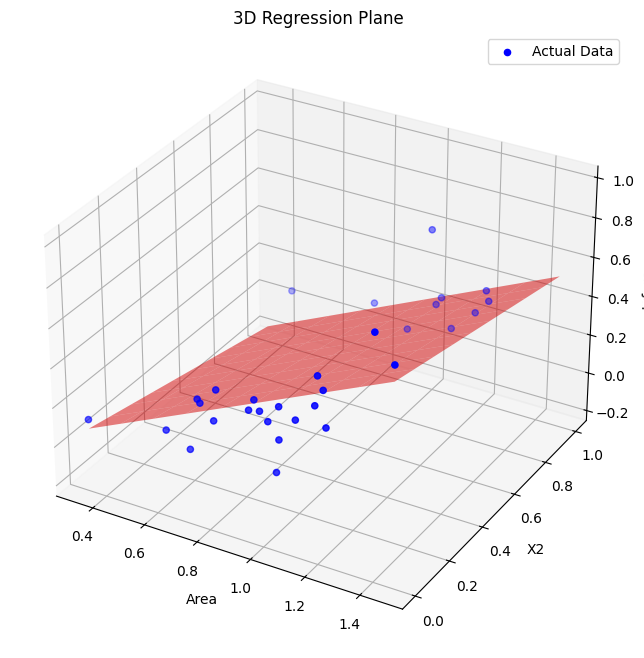

MAE: 0.0995
MSE: 0.0176
RMSE: 0.1325


In [38]:


def fit_linear_regression(X, y):
    # Add intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    XTX = np.dot(X.T, X)
    XTY = np.dot(X.T, y)
    beta = np.linalg.solve(XTX, XTY)
    return beta

# Extracting X and y
y = df['Infarc'].values
X = df[['Area', 'X2', 'X3']].values

# Fit the model
coefficients = fit_linear_regression(X, y)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data
ax.scatter(df['Area'], df['X2'], y, color='blue', label='Actual Data')

# Create a meshgrid for the plane
area_range = np.linspace(df['Area'].min(), df['Area'].max(), 10)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 10)
area_grid, x2_grid = np.meshgrid(area_range, x2_range)
z_grid = (coefficients[0] + coefficients[1] * area_grid +
          coefficients[2] * x2_grid + coefficients[3] * 0)  # Assuming X3 = 0 for visualization

# Plot the plane
ax.plot_surface(area_grid, x2_grid, z_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')
ax.set_title('3D Regression Plane')

plt.legend()
plt.show()
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred = np.dot(X_with_intercept, coefficients)

# Calculate MAE, MSE, and RMSE
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")